In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
file=os.getcwd()
file_name = 'Amit_Rapid_Test_ Kits'
absolute_path = os.path.abspath(file_name)
print(absolute_path)
full_path=os.path.join(absolute_path+'.xlsx')
dirname=os.path.dirname(os.path.abspath('Amit Rapid Test Kits'))
dirname

C:\Users\Wishes Lawrence\Amit_Rapid_Test_ Kits


'C:\\Users\\Wishes Lawrence'

In [3]:
df=pd.read_excel(full_path)
df.head()

contract_number  organization_type  \
0  GEMC-511687745454689  Union Territories   
1  GEMC-511687775920436  Union Territories   
2  GEMC-511687753900293  Union Territories   
3  GEMC-511687722834634   State Autonomous   
4  GEMC-511687775922131   State Autonomous   

                                Ministry  \
0  Ministry of Health and Family Welfare   
1  Ministry of Health and Family Welfare   
2  Ministry of Health and Family Welfare   
3                                GUJARAT   
4                                GUJARAT   

                                        Department  \
0                 Directorate of Medical Education   
1                 Directorate of Medical Education   
2                 Directorate of Medical Education   
3  Agriculture and Co-operation Department Gujarat   
4  Agriculture and Co-operation Department Gujarat   

                  Organization_name                      office_zone  \
0  Directorate of Medical Education                    SMHS SRINAGAR   
1  Directorate of Medical Education                    SMHS SRINAGAR   
2  Directorate of Medical Education                    SMHS SRINAGAR   
3               Kamdhenu University  Kamdhenu University Gandhinagar   
4               Kamdhenu University  Kamdhenu University Gandhinagar   

                                  Buyer_Designation buying_mode  \
0                                  SENIOR ASSISTANT      Direct   
1                                  SENIOR ASSISTANT      Direct   
2                                  SENIOR ASSISTANT      Direct   
3  Assistant professor Vet pharmac and toxi Navsari      Direct   
4  Assistant professor Vet pharmac and toxi Navsari      Direct   

     contract_date     Total  \
0  01/1/2024 10:43   60000.0   
1  01/1/2024 10:45   20000.0   
2  01/1/2024 10:53  192000.0   
3  01/1/2024 11:10    4945.0   
4  01/1/2024 11:12    6745.0   

                                            products                 brands  \
0  MB Lab Consumables Non-Vacuum Blood Collection...     MB Lab Consumables   
1  MB Plastic Industries Non-Vacuum Blood Collect...  MB Plastic Industries   
2  MB Plastic Industries Non-Vacuum Blood Collect...  MB Plastic Industries   
3  LEVRAM Vacuum Blood Collection Tubes K2 EDTA 4...                 LEVRAM   
4  AV labotube Vacuum Blood Collection Tubes Clot...            AV labotube   

      models  Quantities        Prices  
0  HTK3E4-12       30000   ₹ 60000.000  
1      HTPTT       10000   ₹ 20000.000  
2      HTLH2       40000  ₹ 192000.000  
3      LEVAC         500    ₹ 4945.000  
4   LVP65017         500    ₹ 6745.000

In [4]:
# pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

Total    Quantities
count  6.140000e+02  6.140000e+02
mean   1.037593e+05  1.875189e+04
std    6.850234e+05  6.181475e+04
min    2.700000e+02  8.000000e+00
25%    4.941250e+03  1.000000e+03
50%    2.124400e+04  5.000000e+03
75%    6.400000e+04  1.500000e+04
max    1.629000e+07  1.050000e+06

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contract_number    614 non-null    object 
 1   organization_type  614 non-null    object 
 2   Ministry           614 non-null    object 
 3   Department         563 non-null    object 
 4   Organization_name  333 non-null    object 
 5   office_zone        614 non-null    object 
 6   Buyer_Designation  614 non-null    object 
 7   buying_mode        614 non-null    object 
 8   contract_date      614 non-null    object 
 9   Total              614 non-null    float64
 10  products           614 non-null    object 
 11  brands             614 non-null    object 
 12  models             611 non-null    object 
 13  Quantities         614 non-null    int64  
 14  Prices             614 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 72.1+ KB


In [6]:
df1=df.copy()

In [7]:
import re

In [8]:
df1['products'][613]

'LEVRAM Vacuum Blood Collection Tubes Plain tube with no additive 6 milliliter'

In [9]:
pattern=r"\bNon-Vaccum\b|\b'Vaccum'\b'"


In [10]:
pattern = r'\bNon-Vacuum\b|\bVacuum\b'

# Apply lambda function to extract the matched pattern
df1['variant'] = df1['products'].apply(lambda x: re.search(pattern, x).group(0) if re.search(pattern, x) else None)


# Print the result
df1

contract_number   organization_type  \
0    GEMC-511687745454689   Union Territories   
1    GEMC-511687775920436   Union Territories   
2    GEMC-511687753900293   Union Territories   
3    GEMC-511687722834634    State Autonomous   
4    GEMC-511687775922131    State Autonomous   
..                    ...                 ...   
609  GEMC-511687791683716    State Government   
610  GEMC-511687795969460  Central Autonomous   
611  GEMC-511687705813779    State Government   
612  GEMC-511687722476129    State Government   
613  GEMC-511687734290934  Central Autonomous   

                                  Ministry  \
0    Ministry of Health and Family Welfare   
1    Ministry of Health and Family Welfare   
2    Ministry of Health and Family Welfare   
3                                  GUJARAT   
4                                  GUJARAT   
..                                     ...   
609                       HIMACHAL PRADESH   
610  Ministry of Health and Family Welfare   
611                                  DELHI   
612                                 PUNJAB   
613                      Ministry of AYUSH   

                                            Department  \
0                     Directorate of Medical Education   
1                     Directorate of Medical Education   
2                     Directorate of Medical Education   
3      Agriculture and Co-operation Department Gujarat   
4      Agriculture and Co-operation Department Gujarat   
..                                                 ...   
609  Health and Family Welfare Department Himachal ...   
610            Department of Health and Family Welfare   
611         Health and Family Welfare Department Delhi   
612        Health and Family Welfare Department Punjab   
613                                                NaN   

                                   Organization_name  \
0                   Directorate of Medical Education   
1                   Directorate of Medical Education   
2                   Directorate of Medical Education   
3                                Kamdhenu University   
4                                Kamdhenu University   
..                                               ...   
609                                              NaN   
610  All India Institute of Medical Sciences (AIIMS)   
611                                              NaN   
612                                              NaN   
613                                              NaN   

                                office_zone  \
0                             SMHS SRINAGAR   
1                             SMHS SRINAGAR   
2                             SMHS SRINAGAR   
3           Kamdhenu University Gandhinagar   
4           Kamdhenu University Gandhinagar   
..                                      ...   
609  DHSR RED CROSS BHAWAN CHOTTA SHIMLA 02   
610                        Aiims, New Delhi   
611        Srhc Hospital, Narela, Delhi 40,   
612                 ESI hospital Hoshiarpur   
613                         New Delhi/north   

                                    Buyer_Designation buying_mode  \
0                                    SENIOR ASSISTANT      Direct   
1                                    SENIOR ASSISTANT      Direct   
2                                    SENIOR ASSISTANT      Direct   
3    Assistant professor Vet pharmac and toxi Navsari      Direct   
4    Assistant professor Vet pharmac and toxi Navsari      Direct   
..                                                ...         ...   
609                            Medical Superintendent      Direct   
610                                 Storekeeper Drugs      Direct   
611                                  Purchase Officer      Direct   
612                            SENIOR MEDICAL OFFICER      Direct   
613                      Research Officer Scientist 2      Direct   

       contract_date     Total  \
0    01/1/2024 10:43   60000.0   
1    01/1/2024 10:45   20000.0   
2 

In [11]:
text=df1['products'][0]

pattern1=r'(?<=Tubes\s)(\w+\s\w+)'
re.search(pattern1,text)

<re.Match object; span=(53, 60), match='K3 EDTA'>

In [12]:

df1['products_variant'] = df1['products'].apply(lambda x: re.search(pattern1, x).group(1) if re.search(pattern1, x) else '')
df1['products_variant']
df1

contract_number   organization_type  \
0    GEMC-511687745454689   Union Territories   
1    GEMC-511687775920436   Union Territories   
2    GEMC-511687753900293   Union Territories   
3    GEMC-511687722834634    State Autonomous   
4    GEMC-511687775922131    State Autonomous   
..                    ...                 ...   
609  GEMC-511687791683716    State Government   
610  GEMC-511687795969460  Central Autonomous   
611  GEMC-511687705813779    State Government   
612  GEMC-511687722476129    State Government   
613  GEMC-511687734290934  Central Autonomous   

                                  Ministry  \
0    Ministry of Health and Family Welfare   
1    Ministry of Health and Family Welfare   
2    Ministry of Health and Family Welfare   
3                                  GUJARAT   
4                                  GUJARAT   
..                                     ...   
609                       HIMACHAL PRADESH   
610  Ministry of Health and Family Welfare   
611                                  DELHI   
612                                 PUNJAB   
613                      Ministry of AYUSH   

                                            Department  \
0                     Directorate of Medical Education   
1                     Directorate of Medical Education   
2                     Directorate of Medical Education   
3      Agriculture and Co-operation Department Gujarat   
4      Agriculture and Co-operation Department Gujarat   
..                                                 ...   
609  Health and Family Welfare Department Himachal ...   
610            Department of Health and Family Welfare   
611         Health and Family Welfare Department Delhi   
612        Health and Family Welfare Department Punjab   
613                                                NaN   

                                   Organization_name  \
0                   Directorate of Medical Education   
1                   Directorate of Medical Education   
2                   Directorate of Medical Education   
3                                Kamdhenu University   
4                                Kamdhenu University   
..                                               ...   
609                                              NaN   
610  All India Institute of Medical Sciences (AIIMS)   
611                                              NaN   
612                                              NaN   
613                                              NaN   

                                office_zone  \
0                             SMHS SRINAGAR   
1                             SMHS SRINAGAR   
2                             SMHS SRINAGAR   
3           Kamdhenu University Gandhinagar   
4           Kamdhenu University Gandhinagar   
..                                      ...   
609  DHSR RED CROSS BHAWAN CHOTTA SHIMLA 02   
610                        Aiims, New Delhi   
611        Srhc Hospital, Narela, Delhi 40,   
612                 ESI hospital Hoshiarpur   
613                         New Delhi/north   

                                    Buyer_Designation buying_mode  \
0                                    SENIOR ASSISTANT      Direct   
1                                    SENIOR ASSISTANT      Direct   
2                                    SENIOR ASSISTANT      Direct   
3    Assistant professor Vet pharmac and toxi Navsari      Direct   
4    Assistant professor Vet pharmac and toxi Navsari      Direct   
..                                                ...         ...   
609                            Medical Superintendent      Direct   
610                                 Storekeeper Drugs      Direct   
611                                  Purchase Officer      Direct   
612                            SENIOR MEDICAL OFFICER      Direct   
613                      Research Officer Scientist 2      Direct   

       contract_date     Total  \
0    01/1/2024 10:43   60000.0   
1    01/1/2024 10:45   20000.0   
2 

In [13]:
pattern2=r'[1-9]'
df1['size']=df1['products'].apply(lambda x: re.search(pattern2, x).group(0) if re.search(pattern2, x) else '')
df1

contract_number   organization_type  \
0    GEMC-511687745454689   Union Territories   
1    GEMC-511687775920436   Union Territories   
2    GEMC-511687753900293   Union Territories   
3    GEMC-511687722834634    State Autonomous   
4    GEMC-511687775922131    State Autonomous   
..                    ...                 ...   
609  GEMC-511687791683716    State Government   
610  GEMC-511687795969460  Central Autonomous   
611  GEMC-511687705813779    State Government   
612  GEMC-511687722476129    State Government   
613  GEMC-511687734290934  Central Autonomous   

                                  Ministry  \
0    Ministry of Health and Family Welfare   
1    Ministry of Health and Family Welfare   
2    Ministry of Health and Family Welfare   
3                                  GUJARAT   
4                                  GUJARAT   
..                                     ...   
609                       HIMACHAL PRADESH   
610  Ministry of Health and Family Welfare   
611                                  DELHI   
612                                 PUNJAB   
613                      Ministry of AYUSH   

                                            Department  \
0                     Directorate of Medical Education   
1                     Directorate of Medical Education   
2                     Directorate of Medical Education   
3      Agriculture and Co-operation Department Gujarat   
4      Agriculture and Co-operation Department Gujarat   
..                                                 ...   
609  Health and Family Welfare Department Himachal ...   
610            Department of Health and Family Welfare   
611         Health and Family Welfare Department Delhi   
612        Health and Family Welfare Department Punjab   
613                                                NaN   

                                   Organization_name  \
0                   Directorate of Medical Education   
1                   Directorate of Medical Education   
2                   Directorate of Medical Education   
3                                Kamdhenu University   
4                                Kamdhenu University   
..                                               ...   
609                                              NaN   
610  All India Institute of Medical Sciences (AIIMS)   
611                                              NaN   
612                                              NaN   
613                                              NaN   

                                office_zone  \
0                             SMHS SRINAGAR   
1                             SMHS SRINAGAR   
2                             SMHS SRINAGAR   
3           Kamdhenu University Gandhinagar   
4           Kamdhenu University Gandhinagar   
..                                      ...   
609  DHSR RED CROSS BHAWAN CHOTTA SHIMLA 02   
610                        Aiims, New Delhi   
611        Srhc Hospital, Narela, Delhi 40,   
612                 ESI hospital Hoshiarpur   
613                         New Delhi/north   

                                    Buyer_Designation buying_mode  \
0                                    SENIOR ASSISTANT      Direct   
1                                    SENIOR ASSISTANT      Direct   
2                                    SENIOR ASSISTANT      Direct   
3    Assistant professor Vet pharmac and toxi Navsari      Direct   
4    Assistant professor Vet pharmac and toxi Navsari      Direct   
..                                                ...         ...   
609                            Medical Superintendent      Direct   
610                                 Storekeeper Drugs      Direct   
611                                  Purchase Officer      Direct   
612                            SENIOR MEDICAL OFFICER      Direct   
613                      Research Officer Scientist 2      Direct   

       contract_date     Total  \
0    01/1/2024 10:43   60000.0   
1    01/1/2024 10:45   20000.0   
2 

# Getting the frequency plots for each column

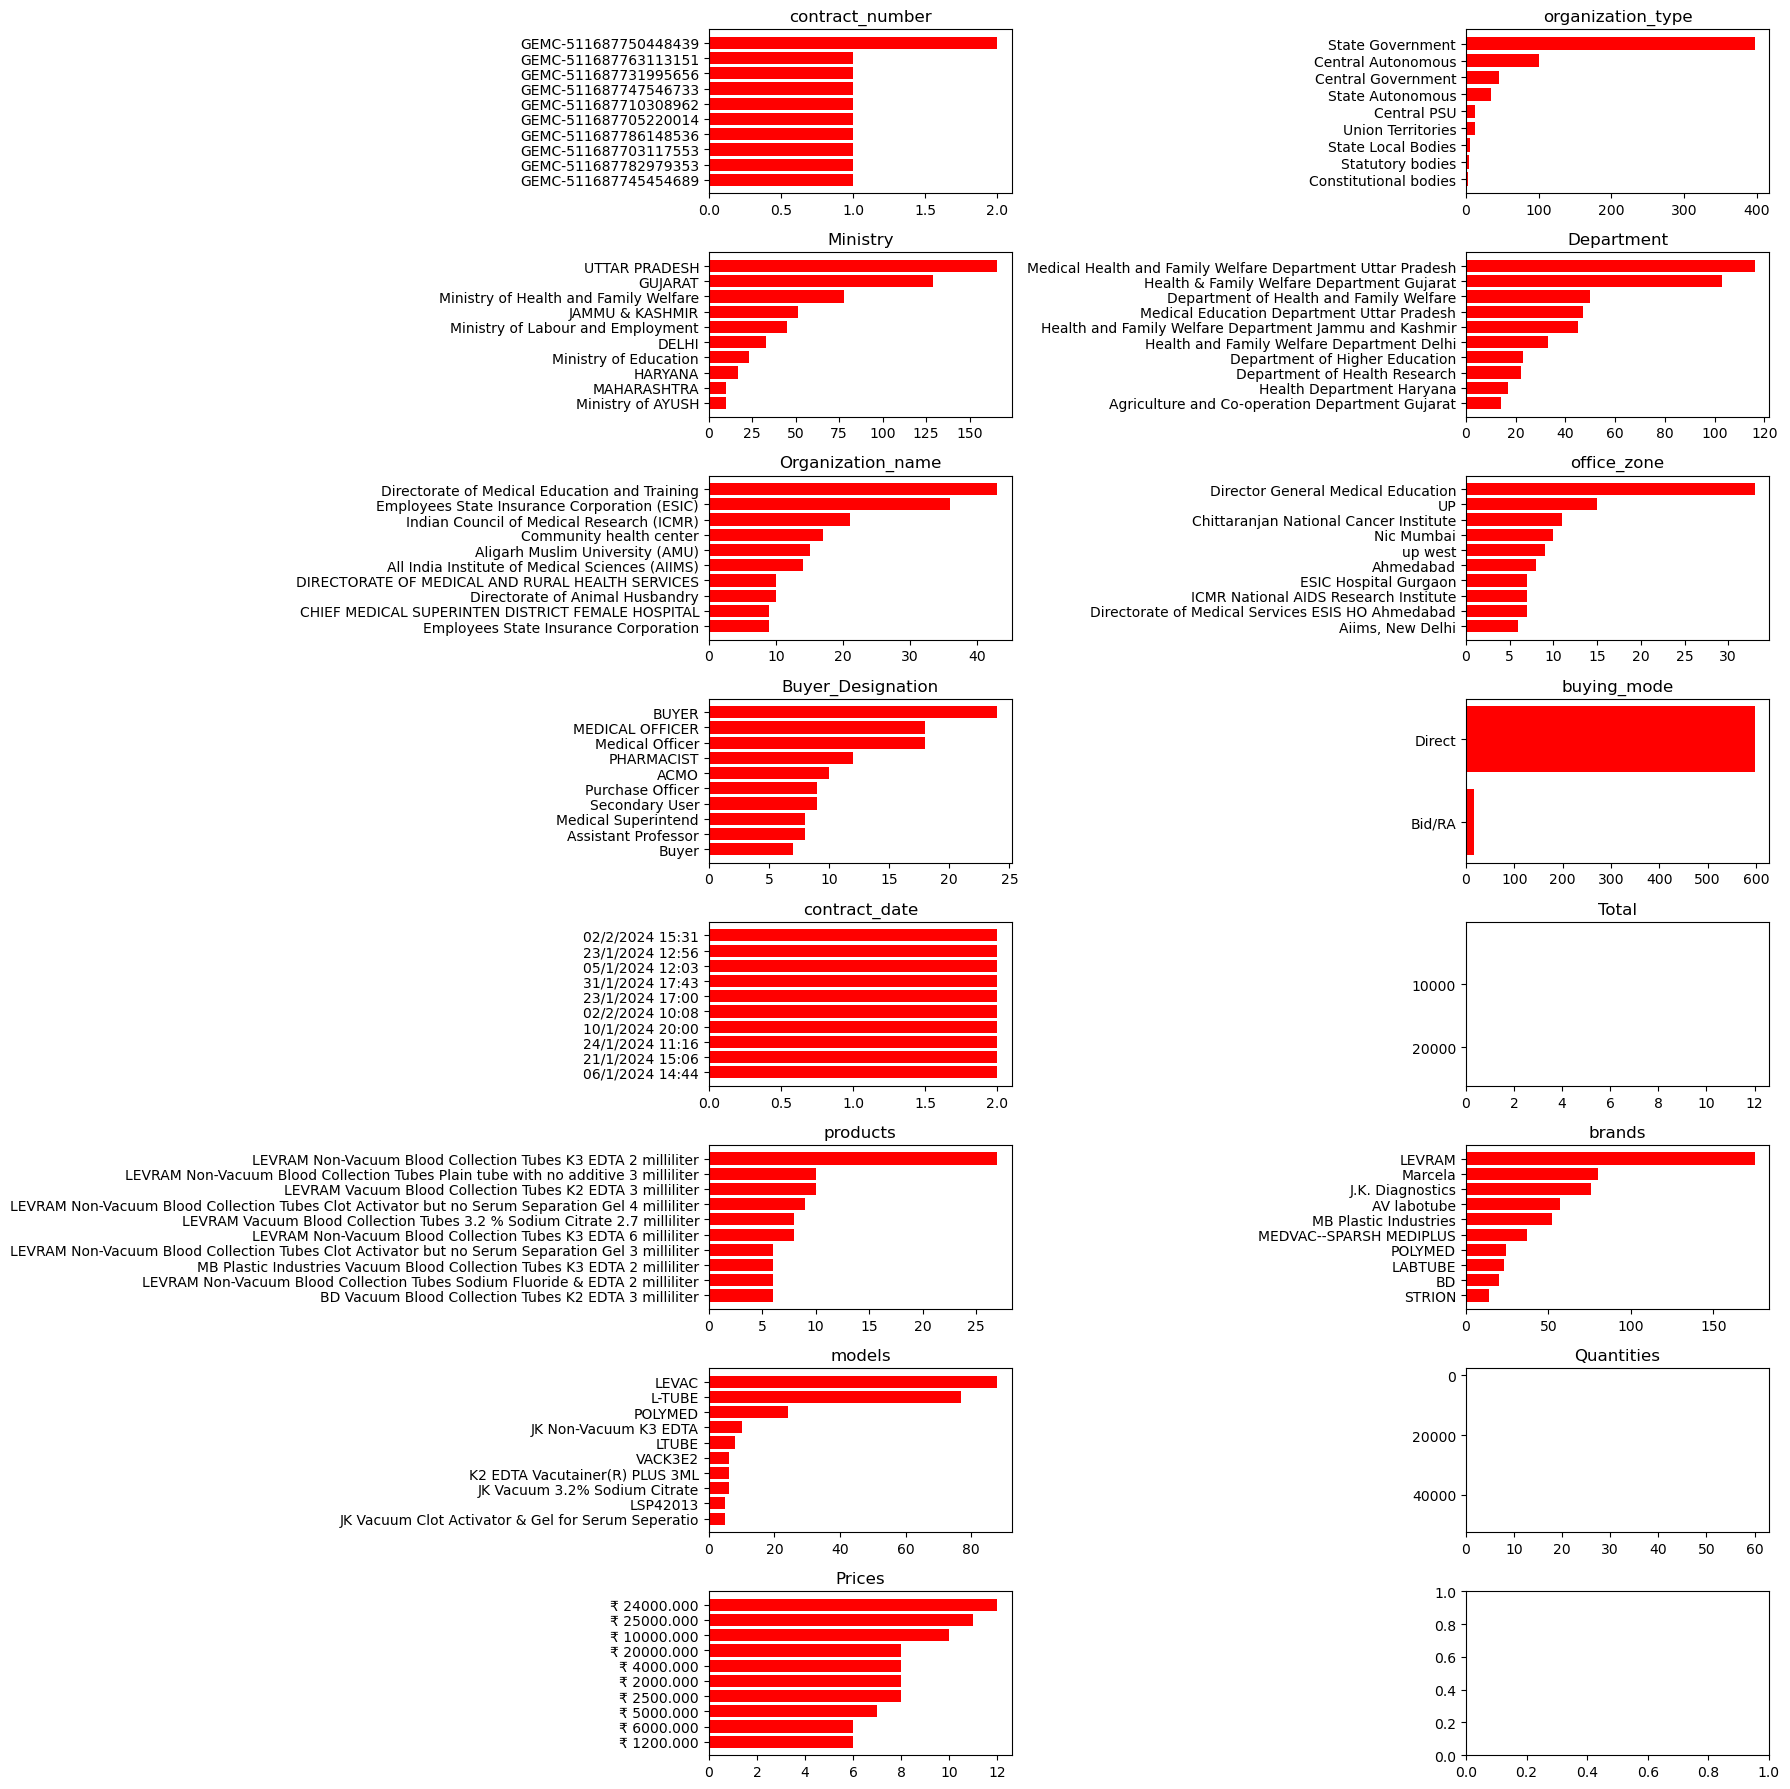

In [14]:
import matplotlib.pyplot as plt

# Increase figure size
plt.rcParams["figure.figsize"] = (18, 18)

# Define the number of rows and columns for subplots
num_cols = 2
num_rows = (len(df.columns) + num_cols - 1) // num_cols  

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a horizontal bar plot for top 10 value counts
for i, column in enumerate(df.columns):
    counts = df[column].value_counts().nlargest(10)
    x = counts.index
    y = counts.values
    
    # Check if counts array is empty
    if len(counts) == 0:
        print(f"No data for column {column}")  # Debugging statement
        continue  # Skip this column if counts array is empty
    
    axes[i].barh(x, y, color='red')
    axes[i].set_title(column)
    axes[i].invert_yaxis()  # To display the highest count at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Getting the pieplots for each column

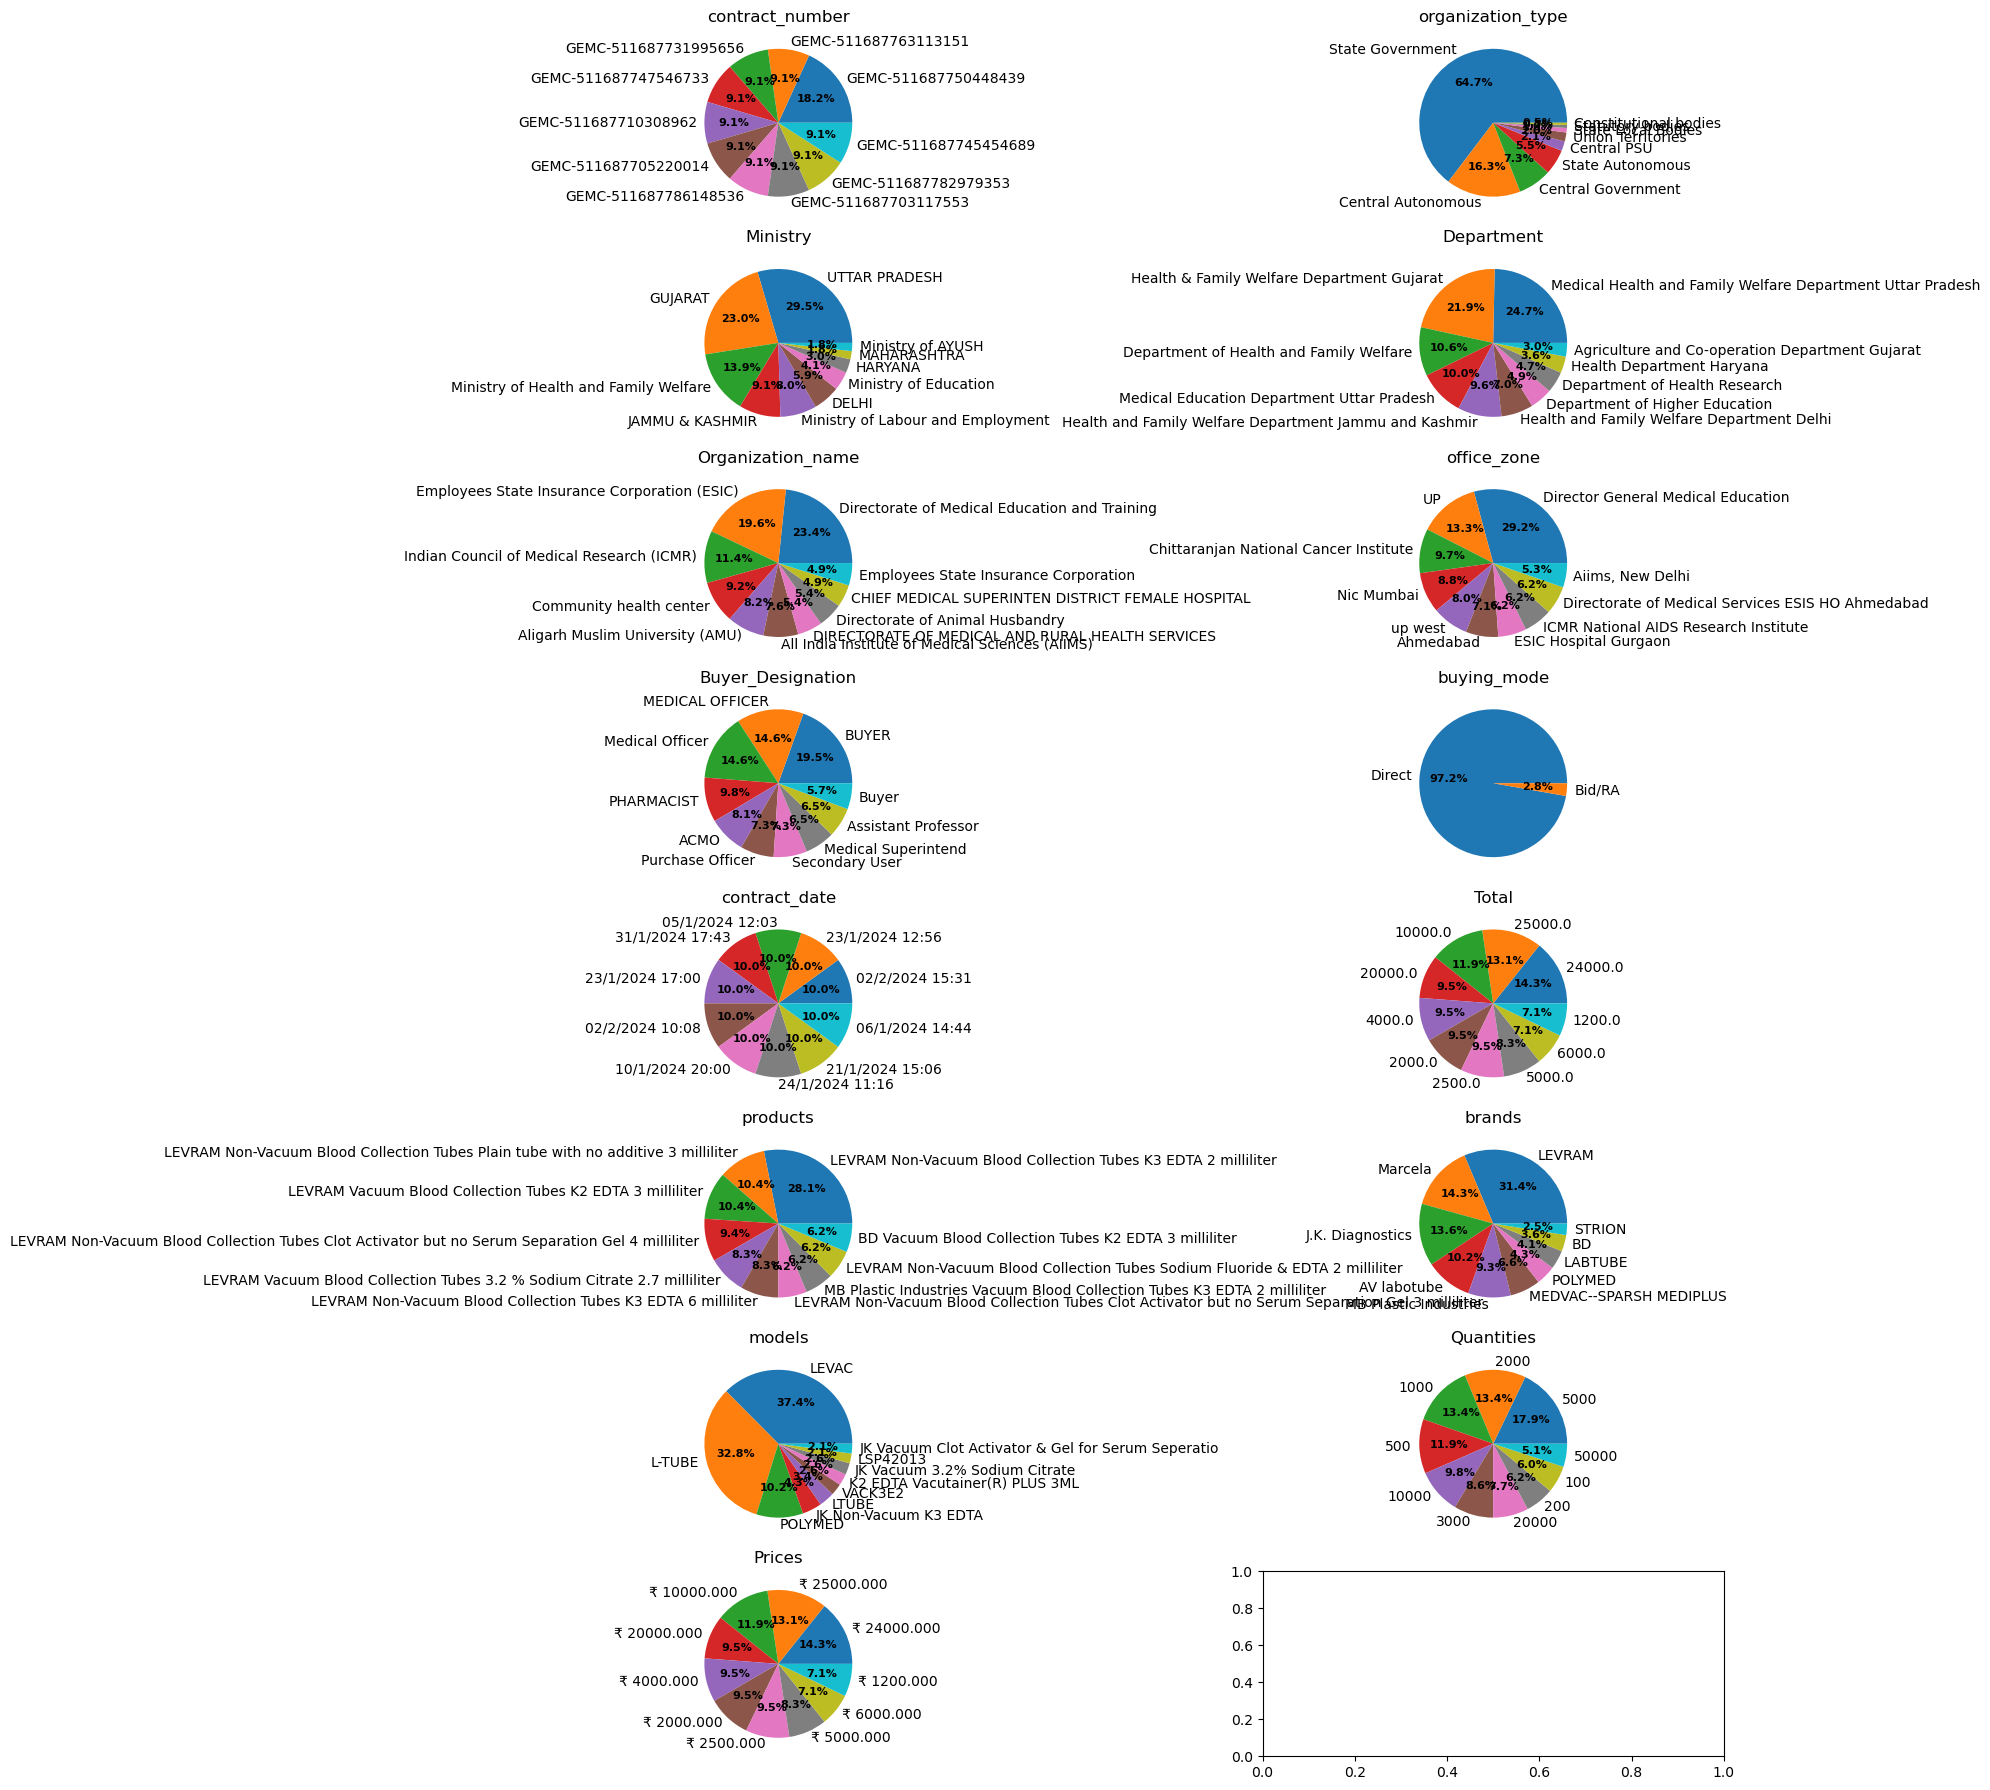

In [15]:
import matplotlib.pyplot as plt

# Increase figure size
plt.rcParams["figure.figsize"] = (18, 18)

# Define the number of rows and columns for subplots
num_cols = 2
num_rows = (len(df.columns) + num_cols - 1) // num_cols   # Ensure at least 1 row

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a pie chart for top 10 value counts
for i, column in enumerate(df.columns):
    counts = df[column].value_counts().nlargest(10)
    x = counts.index
    y = counts.values
    
    # Access the appropriate subplot for this column
    ax = axes[i]
    
    # Create the pie chart
    wedges, _, autotexts = ax.pie(y, labels=x, autopct='%1.1f%%')
    
    # Set properties of text inside the pie chart
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)
        autotext.set_fontweight('bold')
    
    # Set title for the subplot
    ax.set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


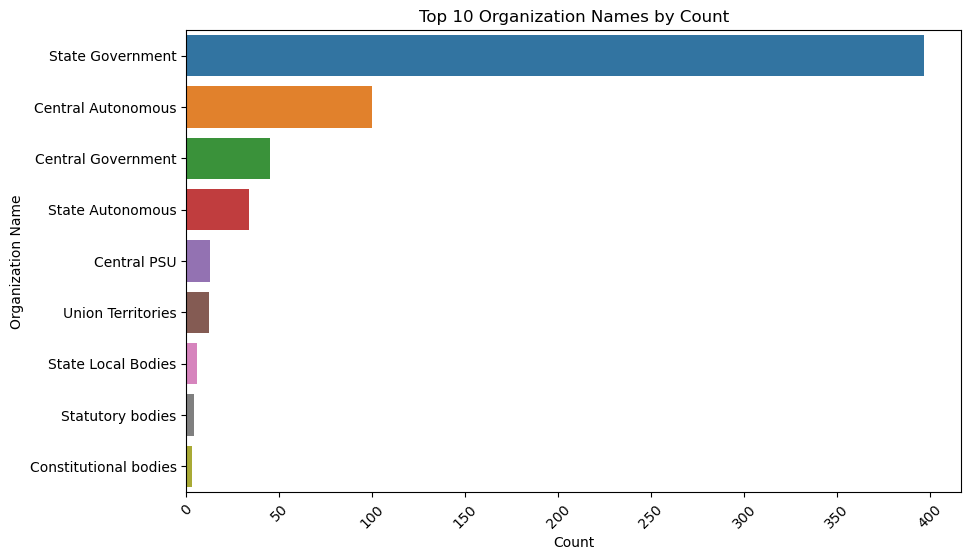

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)


# Assuming df is your DataFrame and it has a column named 'Organization_name'
org_name = df['organization_type'].value_counts().head(10)  # Select the top 10
x = org_name.index
y = org_name.values

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x)

# Set plot labels and title for better readability
plt.xlabel('Count')
plt.ylabel('Organization Name')
plt.title('Top 10 Organization Names by Count')

# Rotate x labels if there are too many organizations
plt.xticks(rotation=45)

# Show the plot
plt.show()


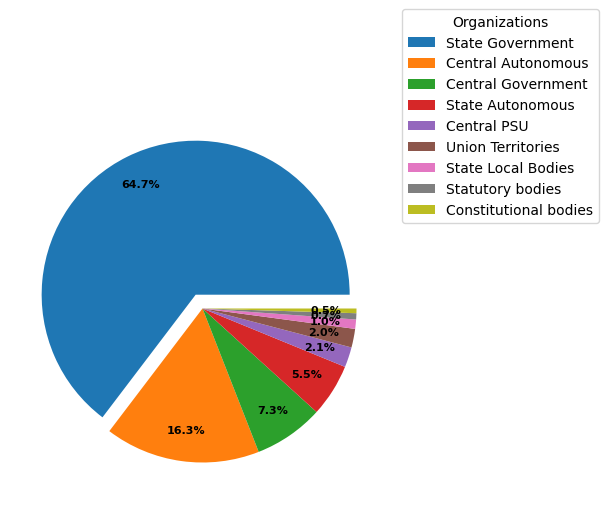

In [17]:
# declaring data 
data = org_name.values
keys = org_name.index
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
explode = (0.1, 0, 0, 0,0,0,0,0,0)
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',pctdistance=0.8,labeldistance=4,explode=explode,
                               textprops=dict(color="black", fontsize=8, fontweight="bold"))  
ax.legend(wedges, keys,
          title="Organizations",
          loc="center left",
          bbox_to_anchor=(1, 0.5, 0.5, 1))
  
# plotting data on chart 
# plt.pie(data, labels=keys, colors=palette_color, labeldistance=3,autopct='%.0f%%') 



<Axes: >

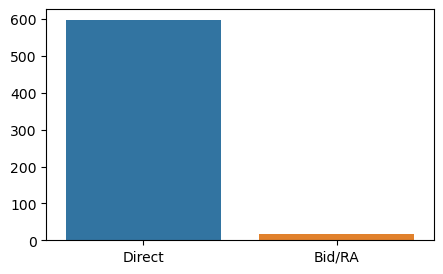

In [18]:
plt.rcParams["figure.figsize"] = (5,3)
buying_counts=df.buying_mode.value_counts()

sns.barplot(x=buying_counts.index,y=buying_counts.values)


In [19]:
quant_count=df.Quantities.value_counts().head(10)
quant_count

5000     60
2000     45
1000     45
500      40
10000    33
3000     29
20000    26
200      21
100      20
50000    17
Name: Quantities, dtype: int64

<Axes: xlabel='Quantities'>

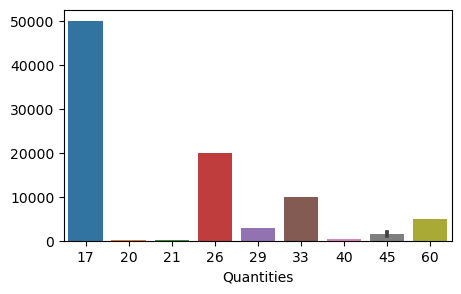

In [20]:
sns.barplot(y=quant_count.index,x=quant_count)

In [21]:
# declaring data 
data = quant_count.values
keys = quant_count.index
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',pctdistance=0.8,labeldistance=4,
                               textprops=dict(color="black", fontsize=8, fontweight="bold"))  
ax.legend(wedges, keys,
          title="Organizations",  loc="center left",
          bbox_to_anchor=(1, 0.5, 0.5, 1))
  
# displaying chart 
plt.show() 

In [22]:
brand_counts=df.brands.value_counts().head(10)

<Axes: >

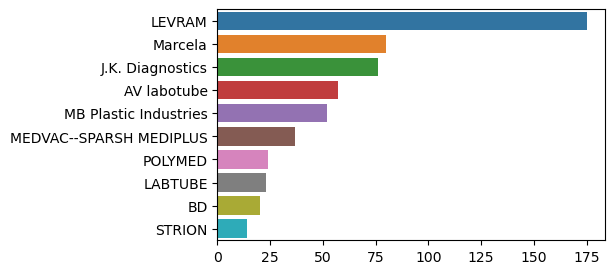

In [23]:
sns.barplot(y=brand_counts.index,x=brand_counts.values)

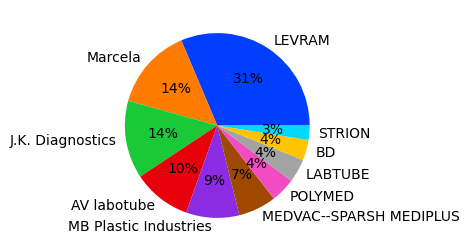

In [24]:
# declaring data 
data = brand_counts.values
keys = brand_counts.index
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

In [25]:

fig = px.scatter(df, x=df['Total'], y=df['Quantities'],color='Total',hover_data=['Quantities'])
fig.show()

In [26]:
x=df.Total
y=df.Quantities
px.scatter(df,x,y,hover_data)

NameError: name 'hover_data' is not defined

In [ ]:
buyer_desig=df.Buyer_Designation.value_counts()
len(buyer_desig)


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
# Create boxplots for each numerical column in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Total'])
plt.title('Boxplot of Price')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

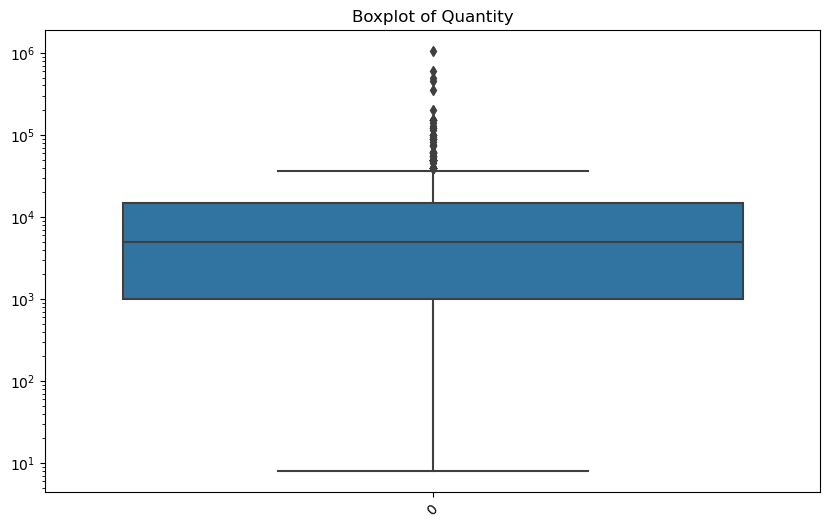

In [30]:
# Create boxplots for each numerical column in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Quantities'])
plt.title('Boxplot of Quantity')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


In [31]:
df.head()

contract_number  organization_type  \
0  GEMC-511687745454689  Union Territories   
1  GEMC-511687775920436  Union Territories   
2  GEMC-511687753900293  Union Territories   
3  GEMC-511687722834634   State Autonomous   
4  GEMC-511687775922131   State Autonomous   

                                Ministry  \
0  Ministry of Health and Family Welfare   
1  Ministry of Health and Family Welfare   
2  Ministry of Health and Family Welfare   
3                                GUJARAT   
4                                GUJARAT   

                                        Department  \
0                 Directorate of Medical Education   
1                 Directorate of Medical Education   
2                 Directorate of Medical Education   
3  Agriculture and Co-operation Department Gujarat   
4  Agriculture and Co-operation Department Gujarat   

                  Organization_name                      office_zone  \
0  Directorate of Medical Education                    SMHS SRINAGAR   
1  Directorate of Medical Education                    SMHS SRINAGAR   
2  Directorate of Medical Education                    SMHS SRINAGAR   
3               Kamdhenu University  Kamdhenu University Gandhinagar   
4               Kamdhenu University  Kamdhenu University Gandhinagar   

                                  Buyer_Designation buying_mode  \
0                                  SENIOR ASSISTANT      Direct   
1                                  SENIOR ASSISTANT      Direct   
2                                  SENIOR ASSISTANT      Direct   
3  Assistant professor Vet pharmac and toxi Navsari      Direct   
4  Assistant professor Vet pharmac and toxi Navsari      Direct   

     contract_date     Total  \
0  01/1/2024 10:43  60000.00   
1  01/1/2024 10:45  20000.00   
2  01/1/2024 10:53 192000.00   
3  01/1/2024 11:10   4945.00   
4  01/1/2024 11:12   6745.00   

                                            products                 brands  \
0  MB Lab Consumables Non-Vacuum Blood Collection...     MB Lab Consumables   
1  MB Plastic Industries Non-Vacuum Blood Collect...  MB Plastic Industries   
2  MB Plastic Industries Non-Vacuum Blood Collect...  MB Plastic Industries   
3  LEVRAM Vacuum Blood Collection Tubes K2 EDTA 4...                 LEVRAM   
4  AV labotube Vacuum Blood Collection Tubes Clot...            AV labotube   

      models  Quantities        Prices  
0  HTK3E4-12       30000   ₹ 60000.000  
1      HTPTT       10000   ₹ 20000.000  
2      HTLH2       40000  ₹ 192000.000  
3      LEVAC         500    ₹ 4945.000  
4   LVP65017         500    ₹ 6745.000

##Taking log of quantiies to reduce skewness

In [32]:
df['Quantities'].skew()

10.741667214976538

C:\Users\Wishes Lawrence\AppData\Local\Temp\ipykernel_12184\997112641.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Quantities', ylabel='Density'>

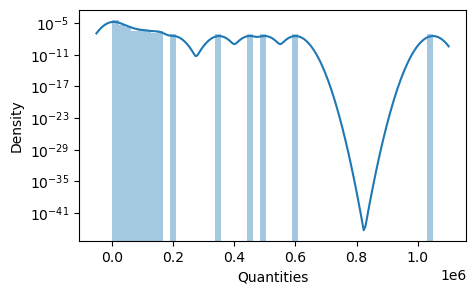

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.yscale('log')

sns.distplot(df['Quantities'])


In [34]:
df['Log_Quantities']=df['Quantities'].apply(lambda x:np.log(x))

In [35]:
df['Log_Quantities'].skew()

-0.043644828671853694

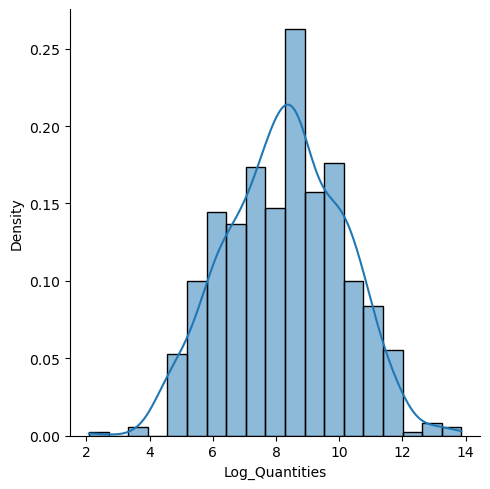

In [36]:
sns.displot(df['Log_Quantities'], kde=True, stat="density")

In [37]:
#remove outliers
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [38]:
determine_outlier_thresholds_iqr(df, 'Quantities', th1=0.25, th3=0.75)

(-20000.0, 36000.0)

In [39]:
def remove_outliers(df, column, lower_limit, upper_limit):
    # Filtering out rows where the value in the specified column falls outside the given range
    filtered_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return filtered_df

In [40]:


plt.show()




C:\Users\Wishes Lawrence\AppData\Local\Temp\ipykernel_12184\1010386641.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Log_Quantities', ylabel='Density'>

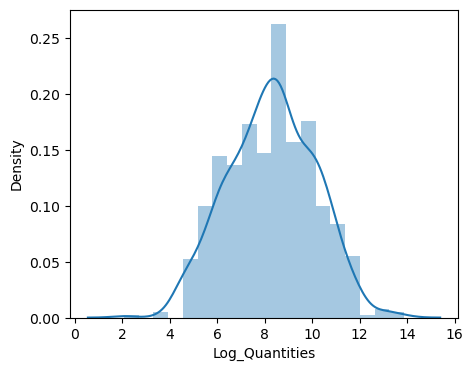

In [41]:
#quantities plot after removing skewnes
plt.figure(figsize=(5, 4))
sns.distplot(df['Log_Quantities'])

In [42]:
#CAlculation of Mean ,Median,Skewness of Numerical columns


Mean=df['Log_Quantities'].mean()
Median=df['Log_Quantities'].median()
Std_dev=df['Log_Quantities'].std()
Mode=df['Log_Quantities'].mode()
print('Log_Quantities Mean:',Mean)
print('Log_Quantities Median:',Median)
print('Log_Quantities STD:',Std_dev)
print('Log_Quantities Mode:',Mode)







Log_Quantities Mean: 8.284701306885403
Log_Quantities Median: 8.517193191416238
Log_Quantities STD: 1.8289686708756179
Log_Quantities Mode: 0   8.52
Name: Log_Quantities, dtype: float64


<Axes: >

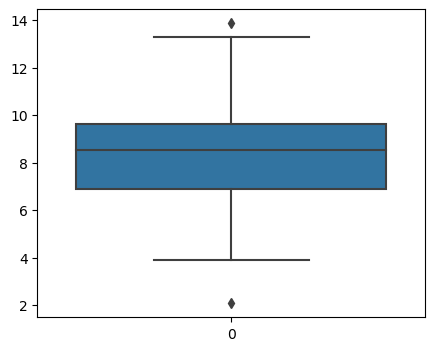

In [43]:
plt.figure(figsize=(5, 4))
sns.boxplot(df['Log_Quantities'])

In [44]:
df1=df.copy()
# Drop the 'Department' and 'Ministry' columns
df1.drop(columns=['Department', 'Ministry','Total'], inplace=True)

# Verify the columns have been dropped
df1.head()

contract_number  organization_type                 Organization_name  \
0  GEMC-511687745454689  Union Territories  Directorate of Medical Education   
1  GEMC-511687775920436  Union Territories  Directorate of Medical Education   
2  GEMC-511687753900293  Union Territories  Directorate of Medical Education   
3  GEMC-511687722834634   State Autonomous               Kamdhenu University   
4  GEMC-511687775922131   State Autonomous               Kamdhenu University   

                       office_zone  \
0                    SMHS SRINAGAR   
1                    SMHS SRINAGAR   
2                    SMHS SRINAGAR   
3  Kamdhenu University Gandhinagar   
4  Kamdhenu University Gandhinagar   

                                  Buyer_Designation buying_mode  \
0                                  SENIOR ASSISTANT      Direct   
1                                  SENIOR ASSISTANT      Direct   
2                                  SENIOR ASSISTANT      Direct   
3  Assistant professor Vet pharmac and toxi Navsari      Direct   
4  Assistant professor Vet pharmac and toxi Navsari      Direct   

     contract_date                                           products  \
0  01/1/2024 10:43  MB Lab Consumables Non-Vacuum Blood Collection...   
1  01/1/2024 10:45  MB Plastic Industries Non-Vacuum Blood Collect...   
2  01/1/2024 10:53  MB Plastic Industries Non-Vacuum Blood Collect...   
3  01/1/2024 11:10  LEVRAM Vacuum Blood Collection Tubes K2 EDTA 4...   
4  01/1/2024 11:12  AV labotube Vacuum Blood Collection Tubes Clot...   

                  brands     models  Quantities        Prices  Log_Quantities  
0     MB Lab Consumables  HTK3E4-12       30000   ₹ 60000.000           10.31  
1  MB Plastic Industries      HTPTT       10000   ₹ 20000.000            9.21  
2  MB Plastic Industries      HTLH2       40000  ₹ 192000.000           10.60  
3                 LEVRAM      LEVAC         500    ₹ 4945.000            6.21  
4            AV labotube   LVP65017         500    ₹ 6745.000            6.21

In [45]:
df_num = df['Log_Quantities']
df_num.head()

0   10.31
1    9.21
2   10.60
3    6.21
4    6.21
Name: Log_Quantities, dtype: float64

In [46]:

df_num_reshaped = df_num.to_frame(name='Log_Quantities')  # replace 'column_name' with your desired namedf_num_reshaped
df_num_reshaped

Log_Quantities
0             10.31
1              9.21
2             10.60
3              6.21
4              6.21
..              ...
609            7.50
610            9.90
611           10.09
612            7.09
613            5.99

[614 rows x 1 columns]

In [47]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num_reshaped)
df_num_scaled

array([[0.69831222],
       [0.60508986],
       [0.72272337],
       [0.35088808],
       [0.35088808],
       [0.54627311],
       [0.46852159],
       [0.60508986],
       [0.60508986],
       [0.46852159],
       [0.48745635],
       [0.4547311 ],
       [0.57482434],
       [0.50292718],
       [0.50292718],
       [0.65100987],
       [0.79153457],
       [0.79153457],
       [0.2143198 ],
       [0.60508986],
       [0.60508986],
       [0.54627311],
       [0.35088808],
       [0.54627311],
       [0.39077006],
       [0.45958126],
       [0.56452631],
       [0.54627311],
       [0.60508986],
       [0.27313655],
       [0.63949546],
       [0.60508986],
       [0.46852159],
       [0.33195331],
       [0.79153457],
       [0.66390662],
       [0.66390662],
       [0.66390662],
       [0.66390662],
       [0.74165814],
       [0.74165814],
       [0.27313655],
       [0.48745635],
       [0.54627311],
       [0.4007645 ],
       [0.60508986],
       [0.60508986],
       [0.546

In [48]:
df_cat=df.select_dtypes(include=['object'])
df_cat.drop(['contract_number','Organization_name','contract_date','Prices','products','office_zone','Buyer_Designation','Ministry'],axis=1,inplace=True)
df_cat.head()

organization_type                                       Department  \
0  Union Territories                 Directorate of Medical Education   
1  Union Territories                 Directorate of Medical Education   
2  Union Territories                 Directorate of Medical Education   
3   State Autonomous  Agriculture and Co-operation Department Gujarat   
4   State Autonomous  Agriculture and Co-operation Department Gujarat   

  buying_mode                 brands     models  
0      Direct     MB Lab Consumables  HTK3E4-12  
1      Direct  MB Plastic Industries      HTPTT  
2      Direct  MB Plastic Industries      HTLH2  
3      Direct                 LEVRAM      LEVAC  
4      Direct            AV labotube   LVP65017

In [49]:
#Encoding  categorical variables
df_dummy = pd.get_dummies(df_cat, drop_first=True)
df_dummy

organization_type_Central Government  organization_type_Central PSU  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
..                                    ...                            ...   
609                                     0                              0   
610                                     0                              0   
611                                     0                              0   
612                                     0                              0   
613                                     0                              0   

     organization_type_Constitutional bodies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
609                                        0   
610                                        0   
611                                        0   
612                                        0   
613                                        0   

     organization_type_State Autonomous  organization_type_State Government  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     1                                   0   
4                                     1                                   0   
..                                  ...                                 ...   
609                                   0                                   1   
610                                   0                                   0   
611                                   0                                   1   
612                                   0                                   1   
613                                   0                                   0   

     organization_type_State Local Bodies  organization_type_Statutory bodies  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
609                                     0                                   0   
610                                     0                                   0   
611                                     0                                   0   
612                                     0                                   0   
613                                     0                                   0   

     organization_type_Union Territories  \
0                                      1   
1                                      1   
2                                      1   
3                                      0   
4                                      0   
..                                   ...   
609                                    0   
610                                    0   
611                                    0   
612                                    0   
613                                    0   

     Department_Agriculture and Co-operation Department Gujarat 

In [50]:
df_target=df['Total']
df_target

0      60000.00
1      20000.00
2     192000.00
3       4945.00
4       6745.00
         ...   
609     6120.00
610    56200.00
611   150000.00
612     3480.00
613     2000.00
Name: Total, Length: 614, dtype: float64

In [51]:
# Scaling Quantities Column using Min Max Sacalar
# Convert df_num1_scaled to a DataFrame
df_num_scaled = pd.DataFrame(df_num_scaled)  # Replace 'column_name' with the actual column name

# Concatenate df_dummy and df_num1_scaled along the appropriate axis
df_final = pd.concat([df_dummy, df_num_scaled], axis=1)

# Now you can use df_final as your concatenated DataFrame
df_final

organization_type_Central Government  organization_type_Central PSU  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
..                                    ...                            ...   
609                                     0                              0   
610                                     0                              0   
611                                     0                              0   
612                                     0                              0   
613                                     0                              0   

     organization_type_Constitutional bodies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
609                                        0   
610                                        0   
611                                        0   
612                                        0   
613                                        0   

     organization_type_State Autonomous  organization_type_State Government  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     1                                   0   
4                                     1                                   0   
..                                  ...                                 ...   
609                                   0                                   1   
610                                   0                                   0   
611                                   0                                   1   
612                                   0                                   1   
613                                   0                                   0   

     organization_type_State Local Bodies  organization_type_Statutory bodies  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
609                                     0                                   0   
610                                     0                                   0   
611                                     0                                   0   
612                                     0                                   0   
613                                     0                                   0   

     organization_type_Union Territories  \
0                                      1   
1                                      1   
2                                      1   
3                                      0   
4                                      0   
..                                   ...   
609                                    0   
610                                    0   
611                                    0   
612                                    0   
613                                    0   

     Department_Agriculture and Co-operation Department Gujarat 

In [52]:
df_final['Quantity']=df_final[0]
df_final['Quantity']
df_final.drop(columns=[0],inplace=True)
df_final

organization_type_Central Government  organization_type_Central PSU  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
..                                    ...                            ...   
609                                     0                              0   
610                                     0                              0   
611                                     0                              0   
612                                     0                              0   
613                                     0                              0   

     organization_type_Constitutional bodies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
609                                        0   
610                                        0   
611                                        0   
612                                        0   
613                                        0   

     organization_type_State Autonomous  organization_type_State Government  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     1                                   0   
4                                     1                                   0   
..                                  ...                                 ...   
609                                   0                                   1   
610                                   0                                   0   
611                                   0                                   1   
612                                   0                                   1   
613                                   0                                   0   

     organization_type_State Local Bodies  organization_type_Statutory bodies  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
609                                     0                                   0   
610                                     0                                   0   
611                                     0                                   0   
612                                     0                                   0   
613                                     0                                   0   

     organization_type_Union Territories  \
0                                      1   
1                                      1   
2                                      1   
3                                      0   
4                                      0   
..                                   ...   
609                                    0   
610                                    0   
611                                    0   
612                                    0   
613                                    0   

     Department_Agriculture and Co-operation Department Gujarat 


#Considering only Quantity

In [53]:
df_final_1=df_final['Quantity']
df_final_1

0     0.70
1     0.61
2     0.72
3     0.35
4     0.35
      ... 
609   0.46
610   0.66
611   0.68
612   0.43
613   0.33
Name: Quantity, Length: 614, dtype: float64

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df_final is your DataFrame

X=df_final['Quantity'].values.reshape(-1, 1)
y=df['Total'].apply(lambda x:np.log(x))

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Linear Regression with scikit-learn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# OLS Regression with statsmodels
X_train_scaled = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_scaled).fit()
print(ols_model.summary())

# Predictions with OLS
X_test_scaled = sm.add_constant(X_test_scaled)
ols_predictions = ols_model.predict(X_test_scaled)


# Check VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print(vif_data)

MAE: 0.35187277854043025
MSE: 0.19592798399309055
R-squared: 0.9395725667378737
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2553.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.15e-196
Time:                        14:47:43   Log-Likelihood:                -535.33
No. Observations:                 491   AIC:                             1075.
Df Residuals:                     489   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

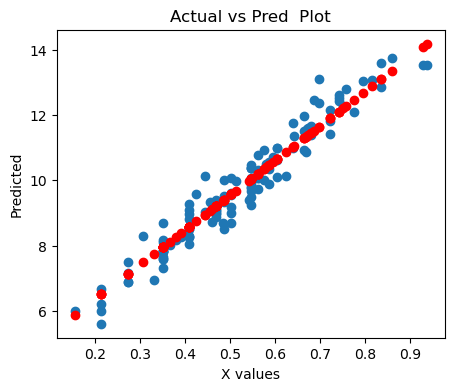

In [55]:
# Plot residual
plt.figure(figsize=(5,4))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred,color='red')

plt.xlabel("X values")
plt.ylabel("Predicted")
plt.title("Actual vs Pred  Plot")
plt.show()


In [56]:
y_train


83    11.70
90    11.92
227   10.63
482    6.70
464   10.59
       ... 
71     7.60
106    7.90
270    8.70
435    9.21
102    9.62
Name: Total, Length: 491, dtype: float64

MAE: 0.35187277854043025
MSE: 0.19592798399309055
R-squared: 0.9395725667378737
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2553.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.15e-196
Time:                        14:48:36   Log-Likelihood:                -535.33
No. Observations:                 491   AIC:                             1075.
Df Residuals:                     489   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

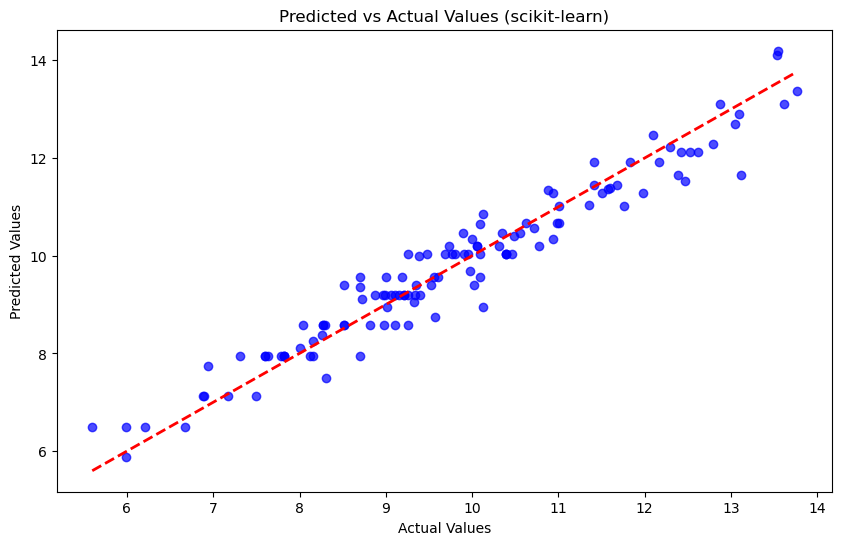

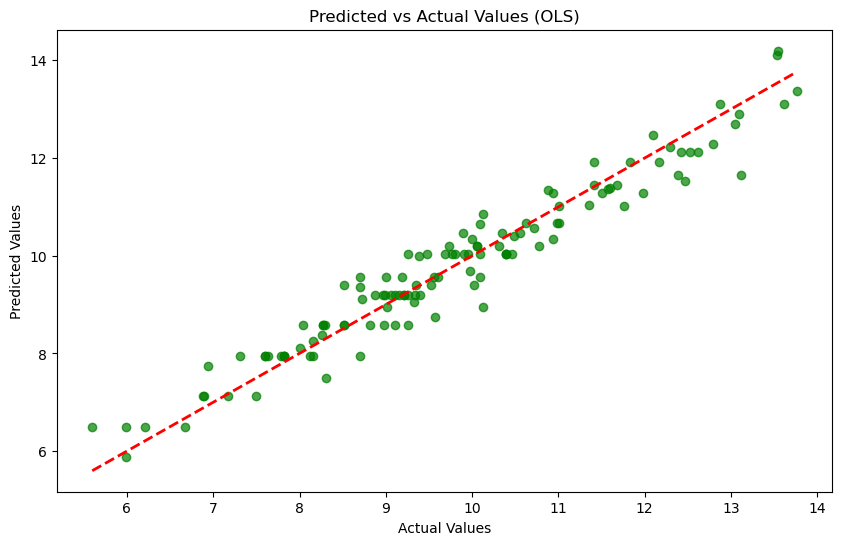

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df_final is your DataFrame

X = df_final['Quantity'].values.reshape(-1, 1)
y = df['Total'].apply(lambda x: np.log(x)).values  # Apply log transformation to the target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression with scikit-learn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# OLS Regression with statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()
print(ols_model.summary())

# Predictions with OLS
X_test_scaled_const = sm.add_constant(X_test_scaled)
ols_predictions = ols_model.predict(X_test_scaled_const)

# Plotting predicted vs actual values for scikit-learn model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (scikit-learn)')
plt.show()

# Plotting predicted vs actual values for OLS model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ols_predictions, alpha=0.7, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (OLS)')
plt.show()



In [60]:

# New quantity value for prediction
new_quantity = np.array([[10000]])

# Scale the new quantity value
new_quantity_scaled = scaler.transform(new_quantity)

# Predict using the scikit-learn model
predicted_total_sklearn = lr.predict(new_quantity_scaled)

predicted_total_sklearn

array([106534.87278734])

In [ ]:
plt.scatter(x=X_train,y=target,color='b')
plt.scatter(x=X_test,y=y_pred,color='red')

In [ ]:
# Train Random Forewst
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Import additional libraries if needed for data manipulation or preprocessing

# Assuming you have your training data in X_train and target variable in y_train

# Create the Random Forest regressor with MAE criterion
rf_regressor = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=10, 
                                     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                     max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                     bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                                     verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the unseen data (X_test)
predictions = rf_regressor.predict(X_test)

# Print the predictions (optional)
print(predictions)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}, RMSE: {rmse}, R-squared: {r2}")
